# **Başlayalım**

bir bilgisayar tarafından üretilen at ve insan resimlerini  içeren zip dosyasını çekelim

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2020-08-14 17:45:23--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.198.128, 172.217.212.128, 172.217.214.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.198.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   139MB/s    in 1.0s    

2020-08-14 17:45:24 (139 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



/tmp/horse-or-human.zip bu satırdaki **tmp**: colabın os bölümündeki **tmp** kısmına indirdik demek.

şimdi de **validation data** için örneklerimizi yine aynı şekilde indirlerim

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2020-08-14 17:46:12--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.202.128, 173.194.197.128, 209.85.146.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.202.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘/tmp/validation-horse-or-human.zip’

/tmp/validation-hor 100%[===================>]  10.95M  --.-KB/s    in 0.1s    

2020-08-14 17:46:12 (83.4 MB/s) - ‘/tmp/validation-horse-or-human.zip’ saved [11480187/11480187]



şimdi dosyalar ve sistem araçlarını elde edelim

In [3]:
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
local_zip ="/tmp/validation-horse-or-human.zip"
zip_ref =zipfile.ZipFile(local_zip,"r")
zip_ref.extractall("/tmp/validation-horse-or-human")
zip_ref.close()

zip dosyasını çıkarttıktan sonra **horse-or-human** adında bir dosya ve bu dosyanın altında **horses** ve **humans** adında dosyalar var. O dosyaların içinde de ilgili resimler mevcut

Ayrıca biz diğer örneklerdeki gibi bir etiketleme işlemi yapmayacağız.Bu uygulamada örneğin **humans** dizisinin altındaki elemanların etiketleri **human** diye yazdıracağız 

Bu işlemi yapan eleman ***ImageGenerator*** fonksiyonudur.

In [10]:
train_horse_dir = os.path.join("/tmp/horse-or-human/horses")
train_human_dir =os.path.join("/tmp/horse-or-human/humans")
validation_horse_dir =os.path.join("/tmp/validation-horse-or-human/horses")
validation_human_dir =os.path.join("/tmp/validation-horse-or-human/humans")
print(len(os.listdir(train_horse_dir)),type(train_horse_dir),type((os.listdir(train_horse_dir))))

500 <class 'str'> <class 'list'>


In [ ]:
print(train_horse_dir,"\n",train_human_dir)

/tmp/horse-or-human/horses 
 /tmp/horse-or-human/humans


**horses** ve **humans** dosyalarının içindeki resimlerin adlarının neler olduklarına bakalım

In [5]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])
print(type(train_horse_names))
train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])
validation_horse_names=os.listdir(validation_horse_dir)
print(validation_horse_names[:10])
validation_human_names =os.listdir(validation_human_dir)
print(validation_human_names[:10])


['horse32-3.png', 'horse07-8.png', 'horse01-4.png', 'horse33-9.png', 'horse03-9.png', 'horse38-9.png', 'horse07-7.png', 'horse42-1.png', 'horse39-7.png', 'horse50-4.png']
<class 'list'>
['human08-26.png', 'human01-07.png', 'human05-07.png', 'human02-06.png', 'human12-12.png', 'human13-08.png', 'human16-19.png', 'human03-05.png', 'human13-21.png', 'human16-07.png']
['horse2-441.png', 'horse6-275.png', 'horse1-436.png', 'horse5-488.png', 'horse1-122.png', 'horse6-198.png', 'horse5-100.png', 'horse4-389.png', 'horse5-400.png', 'horse5-065.png']
['valhuman02-10.png', 'valhuman05-15.png', 'valhuman03-22.png', 'valhuman01-23.png', 'valhuman03-07.png', 'valhuman04-01.png', 'valhuman05-02.png', 'valhuman04-05.png', 'valhuman02-15.png', 'valhuman04-18.png']


toplam **at** ve **insan** resminin sayıları

In [ ]:
print("toplam at sayısı:",len(os.listdir(train_horse_dir)))
print("toplam insan sayısı:",len(os.listdir(train_human_dir)))
print("toplam at sayısı:",len(os.listdir(train_horse_dir)))
print("toplam insan sayısı:",len(os.listdir(train_human_dir)))

toplam at sayısı: 500
toplam insan sayısı: 527


veri setinden bazı örnekler görelim

In [11]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

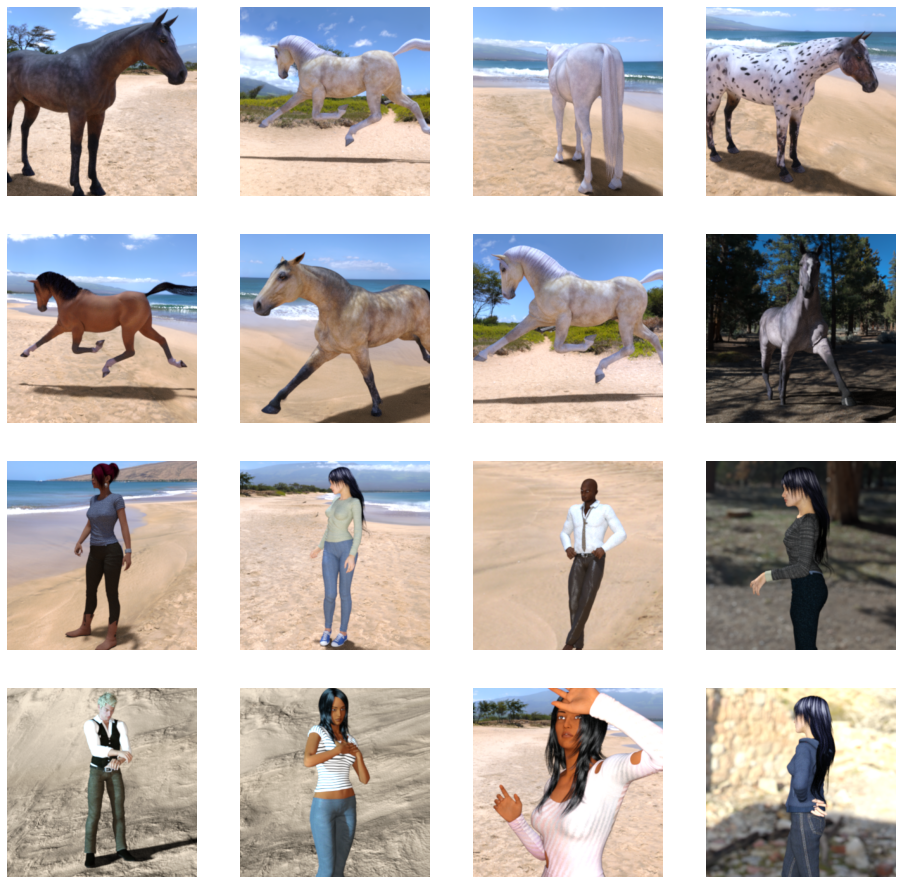

In [12]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

# modelimizi kurmaya başlayalım

In [13]:
import tensorflow as tf

In [14]:
x = tf.keras.layers
model = tf.keras.models.Sequential([
    #1. katman
    x.Conv2D(16,(3,3),activation="relu",input_shape=(300,300,3)),
    x.MaxPooling2D(2,2),
    #2. katman
    x.Conv2D(32,(3,3),activation="relu"),
    x.MaxPooling2D(2,2),
    #3. katman
    x.Conv2D(64,(3,3),activation="relu"),
    x.MaxPooling2D(2,2),
    #4. katman
    x.Conv2D(64,(3,3),activation="relu"),
    x.MaxPooling2D(2,2),
    #5. katman
    x.Conv2D(64,(3,3),activation="relu"),
    x.MaxPooling2D(2,2),
    #Flatten katmanı
    x.Flatten(),
    x.Dense(512,activation="relu"),
    x.Dense(1,activation="sigmoid")

])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

modelimizi derleyelim / compile edelim

In [16]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss="binary_crossentropy",
              optimizer=RMSprop(lr=0.001),
              metrics=["accuracy"])

**loss="binary_crossentropy"** oldu çünkü bu bir **ikili sınıflandırma** problemi.

Ayrıca **optimizer** olarak **RMSprop** seçtik. Öğrenme oranını otomatik olarak ayarlar.(Adam,Adagrad da buna benzer çalışır. Bir fark yoktur.)

# Verimiz için **ön hazırlık**/**preprocessing** yapalım

Daha önceden de bahsettiğimiz işlem sırasında kolaylık olamsı için pixel değerlerini [0,255]'ten alıp [0,1] arasına çekeceğiz ; **Normalleştirme işlemi**/**Normalization**.

Bunu yaparken elle yapmak yerine bunu yapan sınıf olan ***ImageDataGenerator***'ü kullanacağız.Buradaki **rescale** parametresi bize çok yarayacaktır.

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    "/tmp/horse-or-human",
    target_size=(300,300),
    batch_size=128,
    class_mode="binary"
)

validation_generator = validation_datagen.flow_from_directory(
    "/tmp/validation-horse-or-human",
    target_size=(300,300),
    batch_size=32,
    class_mode="binary"
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


**class_mode="binary"** binary_crossentropy'yi kullandığımız için bize **binary label**'lar lazım

# şimdi **training** / **eğitim** yapalım

In [18]:
history = model.fit(
    train_generator,
    steps_per_epoch=8,
    epochs=15,
    verbose=1,
    validation_data=validation_generator,
    validation_steps=8
)

Epoch 1/15
8/8 [==============================] - 8s 948ms/step - loss: 1.2667 - accuracy: 0.5061 - val_loss: 0.6783 - val_accuracy: 0.5000
Epoch 2/15
8/8 [==============================] - 8s 941ms/step - loss: 0.6743 - accuracy: 0.5840 - val_loss: 0.4632 - val_accuracy: 0.8672
Epoch 3/15
8/8 [==============================] - 8s 992ms/step - loss: 0.7046 - accuracy: 0.7334 - val_loss: 0.5644 - val_accuracy: 0.7852
Epoch 4/15
8/8 [==============================] - 8s 997ms/step - loss: 0.4900 - accuracy: 0.8623 - val_loss: 0.6261 - val_accuracy: 0.8477
Epoch 5/15
8/8 [==============================] - 8s 940ms/step - loss: 0.3884 - accuracy: 0.8676 - val_loss: 0.8529 - val_accuracy: 0.8125
Epoch 6/15
8/8 [==============================] - 7s 934ms/step - loss: 0.2774 - accuracy: 0.8932 - val_loss: 1.3452 - val_accuracy: 0.8125
Epoch 7/15
8/8 [==============================] - 8s 1s/step - loss: 0.2335 - accuracy: 0.9155 - val_loss: 0.2783 - val_accuracy: 0.8945
Epoch 8/15
8/8 [=======

# şimdi modelimizi **deneyelim**

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

Saving at.jfif to at.jfif
[0.]
at.jfif is a horse


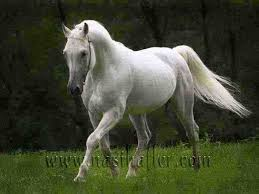

Görüntümüz buydu. Model doğru tahmin verdi.

Eğer orijinal boyutlu görüntüyü (300 * 300) 150 * 150 olarak alırsak eğitimimiz daha hızlı olur ama modeli denediğimizde 300 * 300'deki kadar doğru sonuçlar alamayabiliriz